In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('jai_kisan_logistic_regression.csv')

In [3]:
df.shape
#shape of data

(396030, 27)

In [4]:
df.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
5,20000.0,36 months,13.33,677.07,C,C3,HR Specialist,10+ years,MORTGAGE,86788.0,...,8.0,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\r\nNorth Deniseb...
6,18000.0,36 months,5.32,542.07,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.0,...,8.0,0.0,4178.0,4.9,25.0,f,INDIVIDUAL,3.0,0.0,"1008 Erika Vista Suite 748\r\nEast Stephanie, ..."
7,13000.0,36 months,11.14,426.47,B,B2,Office Depot,10+ years,RENT,46000.0,...,11.0,0.0,13425.0,64.5,15.0,f,INDIVIDUAL,0.0,0.0,USCGC Nunez\r\nFPO AE 30723
8,18900.0,60 months,10.99,410.84,B,B3,Application Architect,10+ years,RENT,103000.0,...,13.0,0.0,18637.0,32.9,40.0,w,INDIVIDUAL,3.0,0.0,USCGC Tran\r\nFPO AP 22690
9,26300.0,36 months,16.29,928.40,C,C5,Regado Biosciences,3 years,MORTGAGE,115000.0,...,13.0,0.0,22171.0,82.4,37.0,f,INDIVIDUAL,1.0,0.0,"3390 Luis Rue\r\nMauricestad, VA 00813"


In [5]:
df.info()
#data types of all attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
df.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48817
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

In [7]:
#conversion of categorical attributes to 'category' 

In [8]:
#Term
df['term'].value_counts()

 36 months    302005
 60 months     94025
Name: term, dtype: int64

In [9]:
#term : we make a note that term is in 'months' that conver it to a numerical data type from object
df['term'] = df['term'].map({' 36 months':36, ' 60 months':60})

In [10]:
#interest rate
df['int_rate'].value_counts()

10.99    12411
12.99     9632
15.61     9350
11.99     8582
8.90      8019
         ...  
14.28        1
18.72        1
18.36        1
30.84        1
24.59        1
Name: int_rate, Length: 566, dtype: int64

In [11]:
df['installment'].value_counts()

327.34     968
332.10     791
491.01     736
336.90     686
392.81     683
          ... 
364.37       1
1015.29      1
398.04       1
544.94       1
572.44       1
Name: installment, Length: 55706, dtype: int64

In [12]:
df['grade'].value_counts()

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

In [13]:
#Grade is an ordinal feature. We can use ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
ord1 = OrdinalEncoder()
ord1.fit([df['grade']])
df["grade"]= ord1.fit_transform(df[["grade"]])

In [14]:
df['grade'].value_counts()

1.0    116018
2.0    105987
0.0     64187
3.0     63524
4.0     31488
5.0     11772
6.0      3054
Name: grade, dtype: int64

In [15]:
df['sub_grade'].value_counts()

B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: sub_grade, dtype: int64

In [16]:
#Sub Grade is an ordinal feature. We can use ordinal encoding
ord1.fit([df['sub_grade']])
df["sub_grade"]= ord1.fit_transform(df[["sub_grade"]])

In [17]:
df['sub_grade'].value_counts()

7.0     26655
8.0     25601
10.0    23662
11.0    22580
6.0     22495
9.0     22085
12.0    21221
13.0    20280
5.0     19182
4.0     18526
14.0    18244
15.0    15993
3.0     15789
16.0    13951
17.0    12223
18.0    11657
2.0     10576
0.0      9729
19.0     9700
1.0      9567
20.0     7917
21.0     7431
22.0     6207
23.0     5361
24.0     4572
25.0     3536
26.0     2766
27.0     2286
28.0     1787
29.0     1397
30.0     1058
31.0      754
32.0      552
33.0      374
34.0      316
Name: sub_grade, dtype: int64

In [18]:
#Employment Title
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [19]:
#Employment title we shall do target encoding later on when we split into test, validation and training data


In [20]:
#Employment Length is an ordinal feature
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [21]:
#Since there are null value and we treat them later; we can do manual ordinal encoding. Also ordinal encoding is not working

df['emp_length'] = df['emp_length'].map({'10+ years':11, '2 years':2, '< 1 year':0,'3 years':3,'5 years':5,'1 year':1,'4 years':4,'6 years':6,'7 years':7,'8 years':8,'9 years':9})


In [22]:
df['emp_length'].value_counts()

11.0    126041
2.0      35827
0.0      31725
3.0      31665
5.0      26495
1.0      25882
4.0      23952
6.0      20841
7.0      20819
8.0      19168
9.0      15314
Name: emp_length, dtype: int64

In [23]:
#home owenership. Ordinal encoding
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [24]:
df['home_ownership'] = df['home_ownership'].map({'MORTGAGE':2, 'RENT':1, 'OWN':3,'OTHER':0,'NONE':0,'ANY':0})

In [25]:
df['home_ownership'].value_counts()

2    198348
1    159790
3     37746
0       146
Name: home_ownership, dtype: int64

In [26]:
#Verification Status. Ordinal encoding
df['verification_status'].value_counts()

Verified           139563
Source Verified    131385
Not Verified       125082
Name: verification_status, dtype: int64

In [27]:
ord1.fit([df['verification_status']])
df["verification_status"]= ord1.fit_transform(df[["verification_status"]])

In [28]:
df['verification_status'].value_counts()

2.0    139563
1.0    131385
0.0    125082
Name: verification_status, dtype: int64

In [29]:
#issue_d : The month which the loan was funded. 
df["issue_d"].value_counts()

Oct-2014    14846
Jul-2014    12609
Jan-2015    11705
Dec-2013    10618
Nov-2013    10496
            ...  
Jul-2007       26
Sep-2008       25
Nov-2007       22
Sep-2007       15
Jun-2007        1
Name: issue_d, Length: 115, dtype: int64

In [30]:
ord1.fit([df['issue_d']])
df["issue_d"]= ord1.fit_transform(df[["issue_d"]])

In [31]:
df["issue_d"].value_counts()

102.0    14846
54.0     12609
45.0     11705
25.0     10618
91.0     10496
         ...  
47.0        26
106.0       25
85.0        22
105.0       15
57.0         1
Name: issue_d, Length: 115, dtype: int64

In [32]:
#loan_status. Fully paid is mapped to 1 and charged off to 0. Charged is as good as a default
df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [33]:
df['loan_status'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

In [34]:
df['loan_status'].value_counts()

1    318357
0     77673
Name: loan_status, dtype: int64

In [35]:
#Purpose
df['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [36]:
#We can do one hot hot encoding for this but it is better to do target encoding in the training , validation and 
#test dataset seperately to avoid leakage


#ohe = pd.get_dummies(df['purpose'], prefix='purpose')
#df = pd.concat((df, col_ohe), axis=1).drop('purpose', axis=1)

In [37]:
#title. Since we know the purpose. We don't need the titles we can drop this column 
df = df.drop('title', axis=1)

In [38]:
df['dti'].value_counts()

0.00     313
14.40    310
19.20    302
16.80    301
18.00    300
        ... 
59.18      1
48.37      1
45.71      1
42.38      1
55.53      1
Name: dti, Length: 4262, dtype: int64

In [39]:
#earliest_Cr_line. lets us know the 'financial age' of the customer. Ordinal encoding
df['earliest_cr_line'].value_counts()

Oct-2000    3017
Aug-2000    2935
Oct-2001    2896
Aug-2001    2884
Nov-2000    2736
            ... 
Jul-1958       1
Nov-1957       1
Jan-1953       1
Jul-1955       1
Aug-1959       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [40]:
ord1.fit([df['earliest_cr_line']])
df["earliest_cr_line"]= ord1.fit_transform(df[["earliest_cr_line"]])

In [41]:
df['earliest_cr_line'].value_counts()

613.0    3017
99.0     2935
614.0    2896
100.0    2884
556.0    2736
         ... 
290.0       1
514.0       1
227.0       1
289.0       1
58.0        1
Name: earliest_cr_line, Length: 684, dtype: int64

In [42]:
df['open_acc'].value_counts()

9.0     36779
10.0    35441
8.0     35137
11.0    32695
7.0     31328
        ...  
55.0        2
76.0        2
58.0        1
57.0        1
90.0        1
Name: open_acc, Length: 61, dtype: int64

In [43]:
df['pub_rec'].value_counts()

0.0     338272
1.0      49739
2.0       5476
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
40.0         1
17.0         1
86.0         1
24.0         1
15.0         1
Name: pub_rec, dtype: int64

In [44]:
df['revol_bal'].value_counts()

0.0         2128
5655.0        41
6095.0        38
7792.0        38
3953.0        37
            ... 
42573.0        1
72966.0        1
105342.0       1
37076.0        1
29244.0        1
Name: revol_bal, Length: 55622, dtype: int64

In [45]:
df['revol_util'].value_counts()

0.00      2213
53.00      752
60.00      739
61.00      734
55.00      730
          ... 
892.30       1
110.10       1
123.00       1
49.63        1
128.10       1
Name: revol_util, Length: 1226, dtype: int64

In [46]:
df['total_acc'].value_counts()

21.0     14280
22.0     14260
20.0     14228
23.0     13923
24.0     13878
         ...  
110.0        1
129.0        1
135.0        1
104.0        1
103.0        1
Name: total_acc, Length: 118, dtype: int64

In [47]:
#intial lsiting status. We do tager encoding later on post splitting of data into test, validation and test
df['initial_list_status'].value_counts()

f    238066
w    157964
Name: initial_list_status, dtype: int64

In [48]:
df['application_type'].value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [49]:
#For application we can use one hot encoding but it is better to use target encoding once we have split the dataset 
#into the training validation and the test dataset and encode them seperately 

#col_ohe = pd.get_dummies(df['application_type'], prefix='application_type')
#df = pd.concat((df, col_ohe), axis=1).drop('application_type', axis=1)

In [50]:
df.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,329.48,1.0,8.0,Marketing,11.0,1,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36,11.99,265.68,1.0,9.0,Credit analyst,4.0,2,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36,10.49,506.97,1.0,7.0,Statistician,0.0,1,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36,6.49,220.65,0.0,1.0,Client Advocate,6.0,1,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60,17.27,609.33,2.0,14.0,Destiny Management Inc.,9.0,2,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
5,20000.0,36,13.33,677.07,2.0,12.0,HR Specialist,11.0,2,86788.0,...,8.0,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\r\nNorth Deniseb...
6,18000.0,36,5.32,542.07,0.0,0.0,Software Development Engineer,2.0,2,125000.0,...,8.0,0.0,4178.0,4.9,25.0,f,INDIVIDUAL,3.0,0.0,"1008 Erika Vista Suite 748\r\nEast Stephanie, ..."
7,13000.0,36,11.14,426.47,1.0,6.0,Office Depot,11.0,1,46000.0,...,11.0,0.0,13425.0,64.5,15.0,f,INDIVIDUAL,0.0,0.0,USCGC Nunez\r\nFPO AE 30723
8,18900.0,60,10.99,410.84,1.0,7.0,Application Architect,11.0,1,103000.0,...,13.0,0.0,18637.0,32.9,40.0,w,INDIVIDUAL,3.0,0.0,USCGC Tran\r\nFPO AP 22690
9,26300.0,36,16.29,928.40,2.0,14.0,Regado Biosciences,3.0,2,115000.0,...,13.0,0.0,22171.0,82.4,37.0,f,INDIVIDUAL,1.0,0.0,"3390 Luis Rue\r\nMauricestad, VA 00813"


In [51]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [52]:
df['pub_rec_bankruptcies'].value_counts()

0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [53]:
df['address'].value_counts()

USCGC Smith\r\nFPO AE 70466                           8
USS Johnson\r\nFPO AE 48052                           8
USNS Johnson\r\nFPO AE 05113                          8
USS Smith\r\nFPO AP 70466                             8
USNS Johnson\r\nFPO AP 48052                          7
                                                     ..
455 Tricia Cove\r\nAustinbury, FL 00813               1
7776 Flores Fall\r\nFernandezshire, UT 05113          1
6577 Mia Harbors Apt. 171\r\nRobertshire, OK 22690    1
8141 Cox Greens Suite 186\r\nMadisonstad, VT 05113    1
787 Michelle Causeway\r\nBriannaton, AR 48052         1
Name: address, Length: 393700, dtype: int64

In [54]:
#Out of 396030 entries there are 393700 unique addresses. Indicating that some applicants have applied multiple times
# or some applicants have the same address (family, friends, co-tenants etc)

#With such high no of uniqie address we can straighaway rule out that target variable is independent of location. 
#To prove it mathematically we can do target encoding of address then logistic regression and see that the coffecient 
#corresponding to address is very close to 0


In [55]:
#Missing value detection
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [56]:
#statistical summary
df.describe()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,377729.000000,396030.000000,3.960300e+05,396030.000000,...,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,41.698053,13.639400,431.849698,1.822337,11.083481,6.272259,1.691094,7.420318e+04,1.036565,...,0.803871,17.379514,363.372265,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,10.212038,4.472157,250.727790,1.333809,6.600958,4.027822,0.636273,6.163762e+04,0.816645,...,0.397068,18.019092,201.075714,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,36.000000,5.320000,16.080000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,36.000000,10.490000,250.330000,1.000000,6.000000,3.000000,1.000000,4.500000e+04,0.000000,...,1.000000,11.280000,165.000000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,36.000000,13.330000,375.430000,2.000000,10.000000,6.000000,2.000000,6.400000e+04,1.000000,...,1.000000,16.910000,381.000000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,36.000000,16.490000,567.300000,3.000000,15.000000,11.000000,2.000000,9.000000e+04,2.000000,...,1.000000,22.980000,552.000000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,60.000000,30.990000,1533.810000,6.000000,34.000000,11.000000,3.000000,8.706582e+06,2.000000,...,1.000000,9999.000000,683.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [57]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [58]:
#Univariate Analysis

#Continous variables are loan_amnt, int_Rate, installment, annual_inc, issue_d, dti, eareliest_cr_line, open_acc, pub_rec
# revol_bal, revol_util, total_acc, mort_acc, pub_rec_bankruptcies

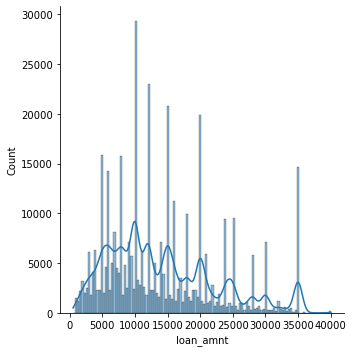

In [59]:
#loan_amntfig, ax = plt.subplots(figsize=(18, 5))
sns.displot( x = 'loan_amnt', data = df, kde = True)

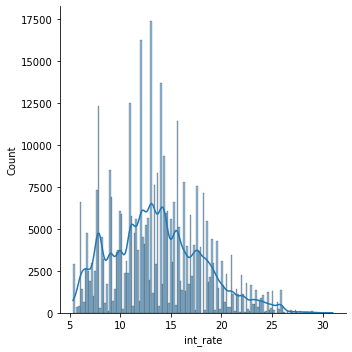

In [60]:
#int rate
sns.displot( x = 'int_rate', data = df, kde = True)

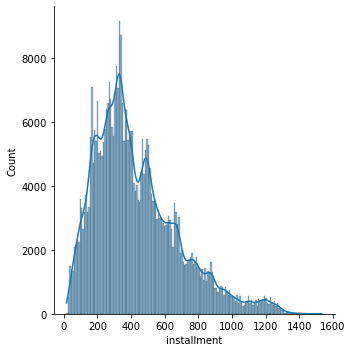

In [61]:
#installment

sns.displot( x = 'installment', data = df, kde = True)

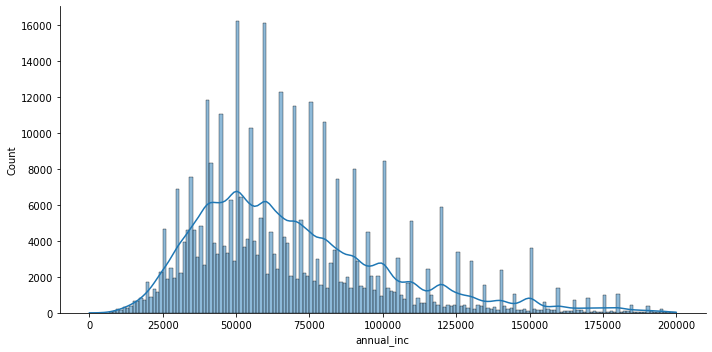

In [62]:
#annual income 

sns.displot( df['annual_inc'][df['annual_inc'] < 200000], kde = True, height = 5, aspect=2)

In [63]:
#97% of the values are captured by taking values less than 200000. We can also bin the data but this worls better IMO
df['annual_inc'][df['annual_inc'] < 200000].count()/df['annual_inc'].count()

0.97893088907406

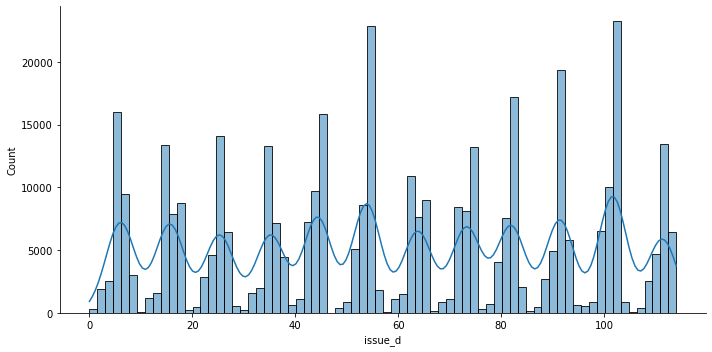

In [64]:
#issue_d
#There are certain months of the year when most lonas are sanctioned
sns.displot( df['issue_d'], kde = True, height = 5, aspect=2)

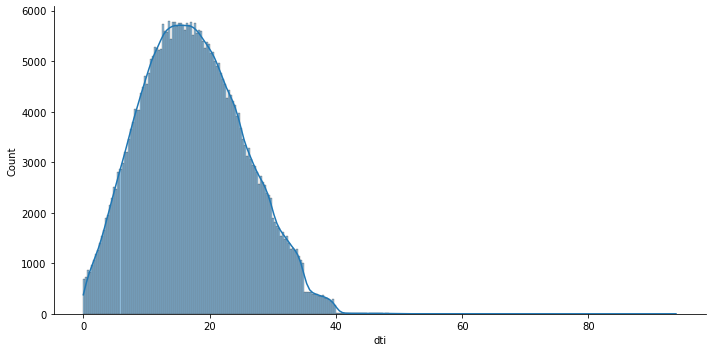

In [65]:
#dti
sns.displot( df['dti'][df['dti'] < 100], kde = True, height = 5, aspect=2)

In [66]:
#99% of dti values are less than 100 so the threshold chosen is correct. We can also bin but this is better
df['dti'][df['dti'] < 100].count()/df['dti'].count()

0.9999797995101382

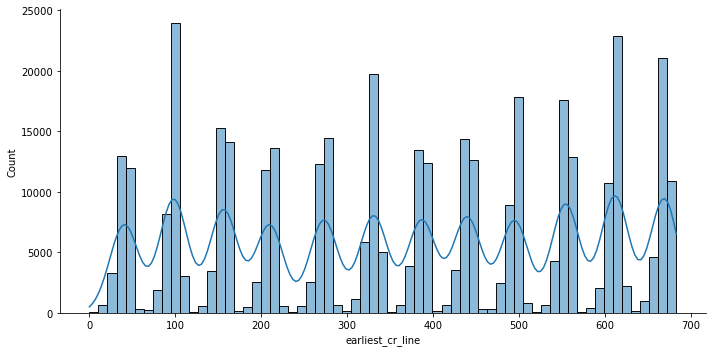

In [67]:
#earliest_cr_line
sns.displot( df['earliest_cr_line'], kde = True, height = 5, aspect=2)

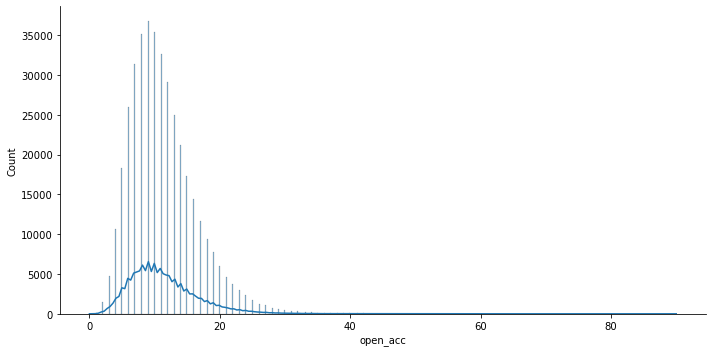

In [68]:
#open_Acc
sns.displot( df['open_acc'], kde = True, height = 5, aspect=2)

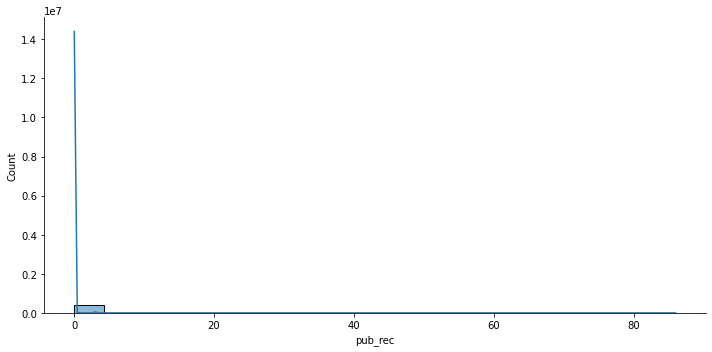

In [69]:
#pub_rec
sns.displot( df['pub_rec'], kde = True, height = 5, aspect=2)

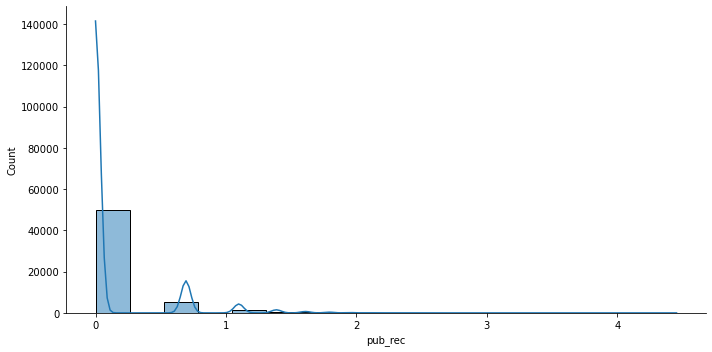

In [70]:
sns.displot( np.log(df['pub_rec']), kde = True, height = 5, aspect=2)
#As we can see 0, 0.5 and 1 account for most of the values

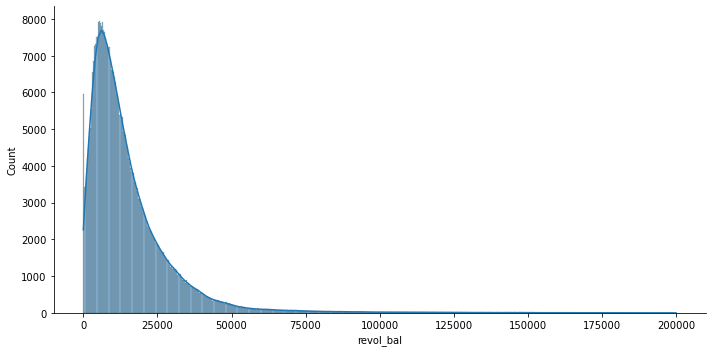

In [71]:
# revol_bal, revol_util, total_acc, mort_acc, pub_rec_bankruptcies
sns.displot( df['revol_bal'][df['revol_bal'] < 200000], kde = True, height = 5, aspect=2)

In [72]:
#We are covering 99% plus data
df['revol_bal'][df['revol_bal'] < 200000].count()/df['revol_bal'].count()

0.9982450824432493

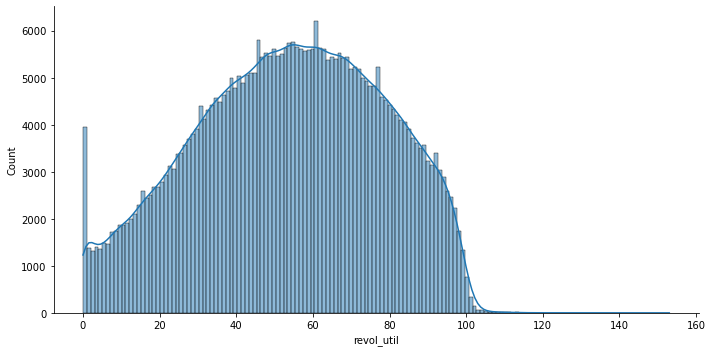

In [73]:
#revol_util
sns.displot( df['revol_util'][df['revol_util'] < 200], kde = True, height = 5, aspect=2)

In [74]:
#We are covering 99% plus data
df['revol_util'][df['revol_util'] < 100].count()/df['revol_util'].count()

0.9968111503610829

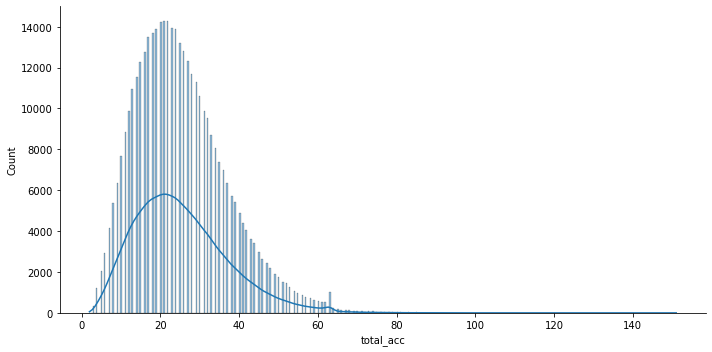

In [75]:
#total_acc
sns.displot( df['total_acc'], kde = True, height = 5, aspect=2)

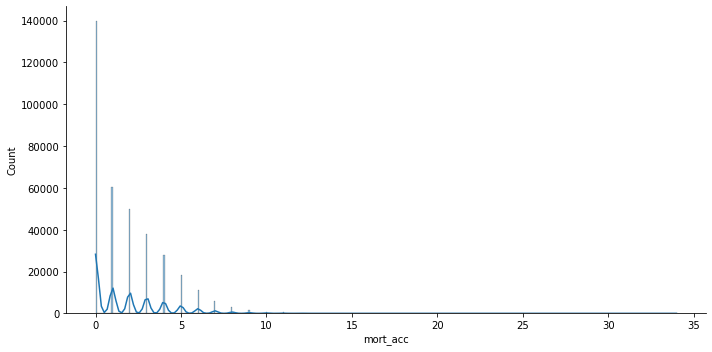

In [76]:
#mort_Acc
sns.displot( df['mort_acc'], kde = True, height = 5, aspect=2)

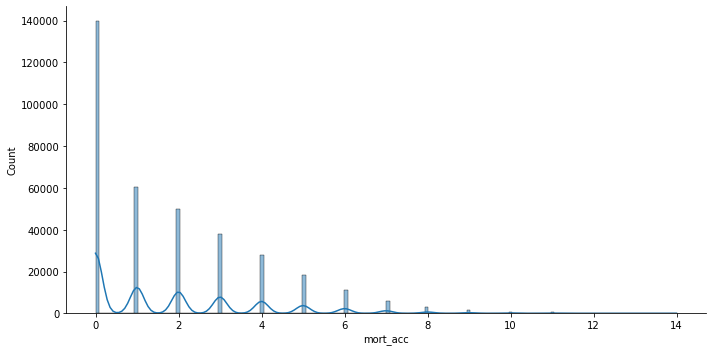

In [77]:
sns.displot( df['mort_acc'][df['mort_acc'] < 15], kde = True, height = 5, aspect=2)

In [78]:
#We are covering 99% plus data
df['mort_acc'][df['mort_acc'] < 10].count()/df['mort_acc'].count()

0.9942328359875501

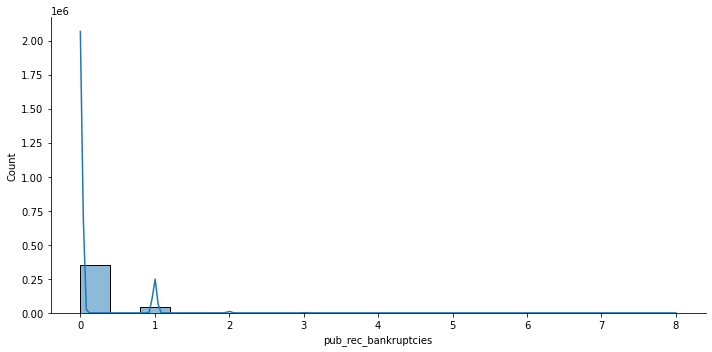

In [79]:
#pub_rec_bankruptcies

sns.displot( df['pub_rec_bankruptcies'], kde = True, height = 5, aspect=2)

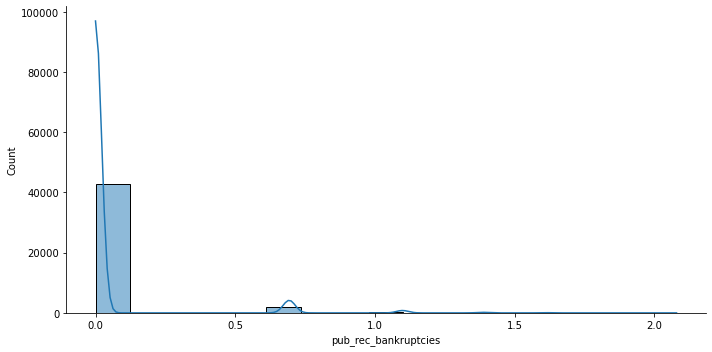

In [80]:
sns.displot( np.log(df['pub_rec_bankruptcies']), kde = True, height = 5, aspect=2)

<AxesSubplot:xlabel='term', ylabel='count'>

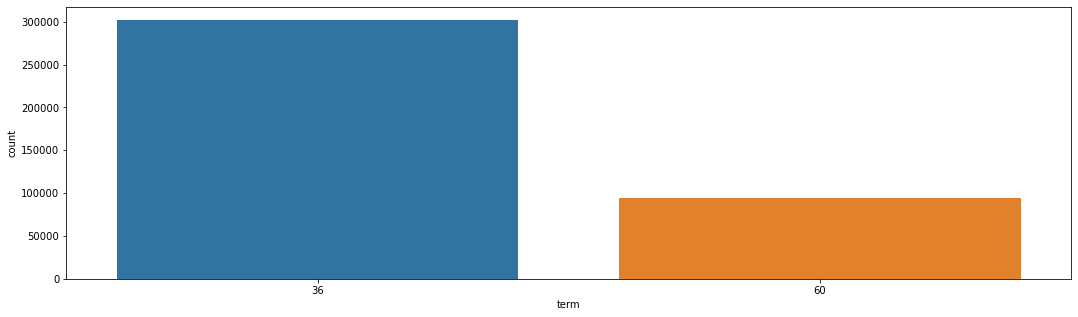

In [81]:
#Barplots/countplots for categorical variables

#term
fig, ax = plt.subplots(figsize=(18, 5))
sns.countplot(x= 'term', data = df, ax= ax) 

<AxesSubplot:xlabel='grade', ylabel='count'>

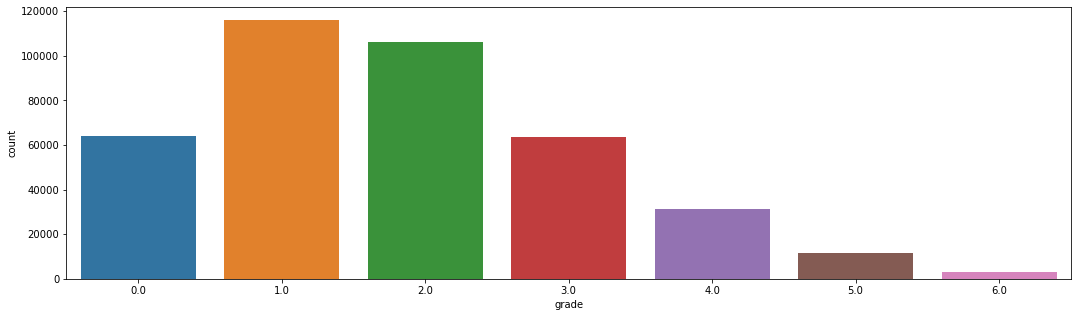

In [82]:
#grade
fig, ax = plt.subplots(figsize=(18, 5))
sns.countplot(x= 'grade', data = df, ax= ax)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

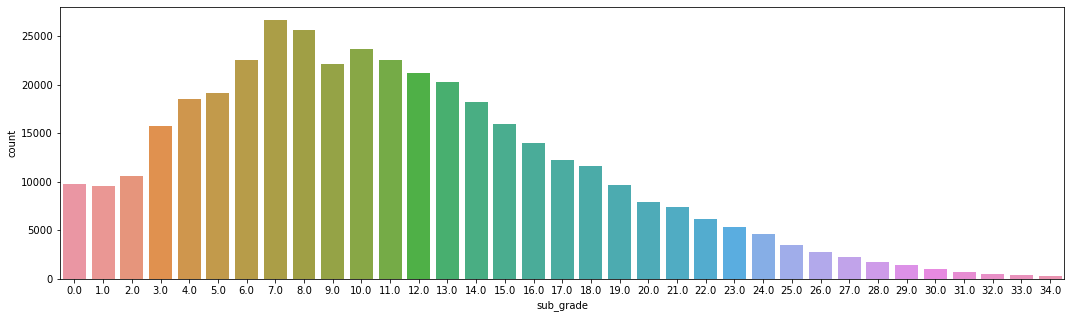

In [83]:
#sub_grade
fig, ax = plt.subplots(figsize=(18, 5))
sns.countplot(x= 'sub_grade', data = df, ax= ax)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

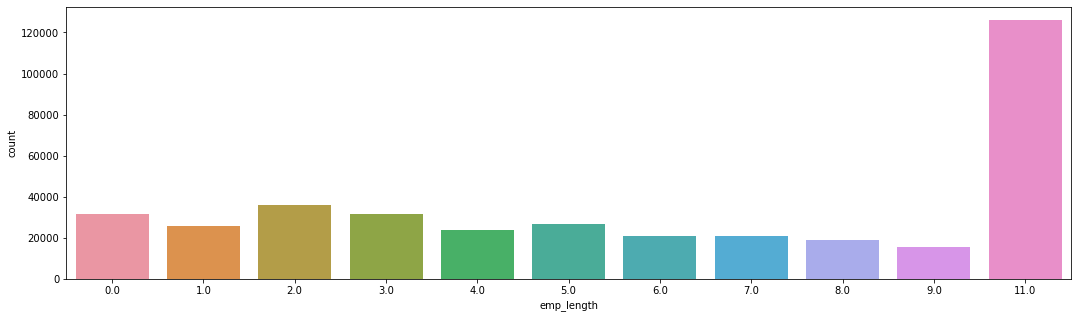

In [84]:
#emp_length
fig, ax = plt.subplots(figsize=(18, 5))
sns.countplot(x= 'emp_length', data = df, ax= ax)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

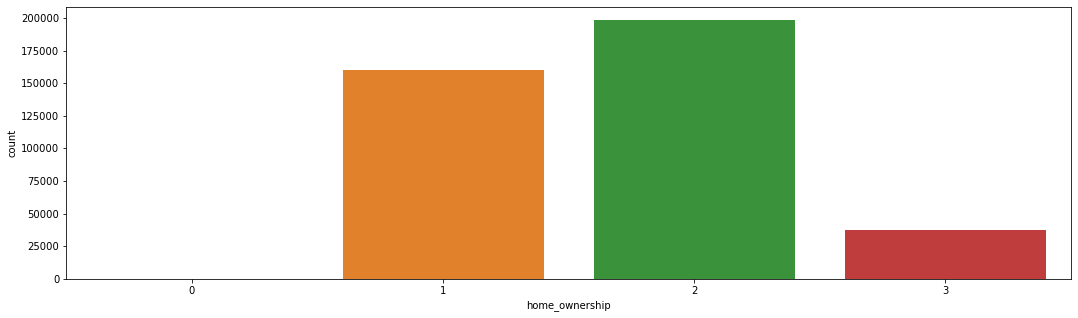

In [85]:
#home_ownership
fig, ax = plt.subplots(figsize=(18, 5))
sns.countplot(x= 'home_ownership', data = df, ax= ax)

<AxesSubplot:xlabel='verification_status', ylabel='count'>

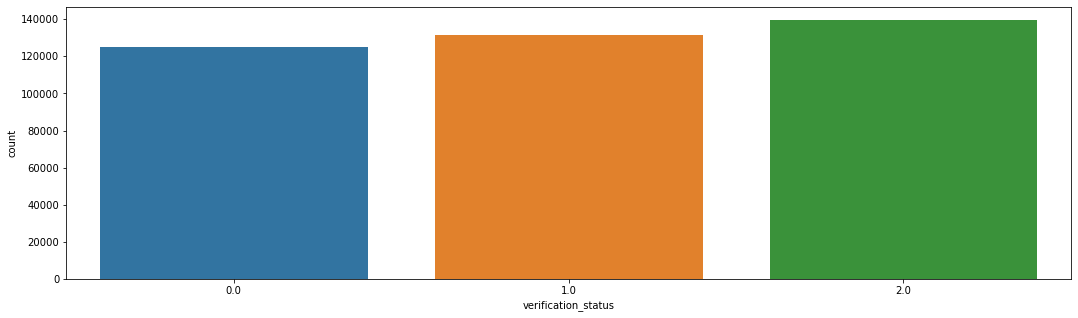

In [86]:
#verification status
fig, ax = plt.subplots(figsize=(18, 5))
sns.countplot(x= 'verification_status', data = df, ax= ax)

<AxesSubplot:xlabel='purpose', ylabel='count'>

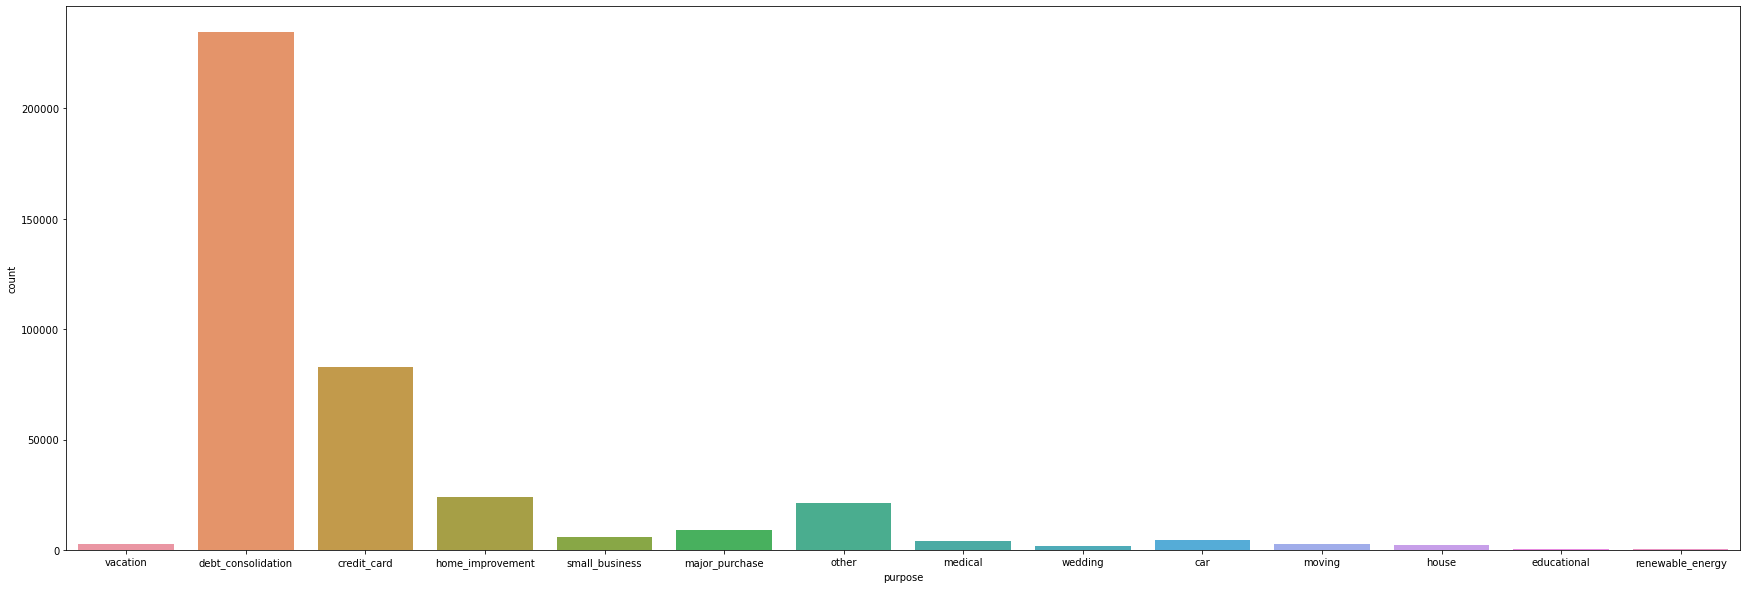

In [87]:
#purpose
fig, ax = plt.subplots(figsize=(30, 10))
sns.countplot(x= 'purpose', data = df, ax= ax)

<AxesSubplot:xlabel='initial_list_status', ylabel='count'>

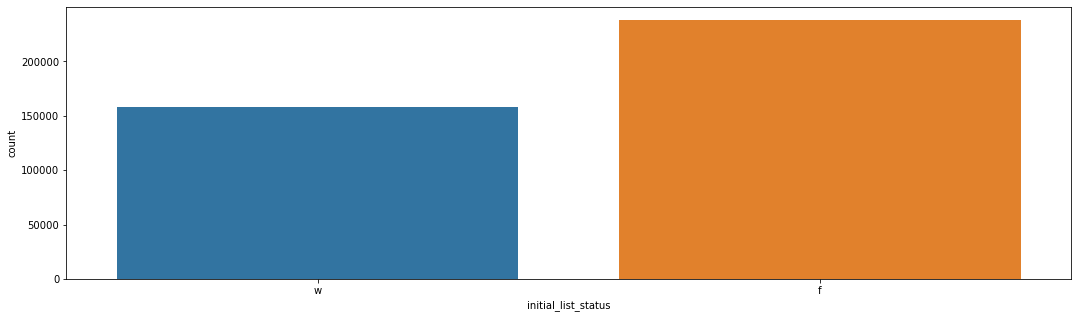

In [88]:
#intial_list_status
fig, ax = plt.subplots(figsize=(18, 5))
sns.countplot(x= 'initial_list_status', data = df, ax= ax)

<AxesSubplot:xlabel='application_type', ylabel='count'>

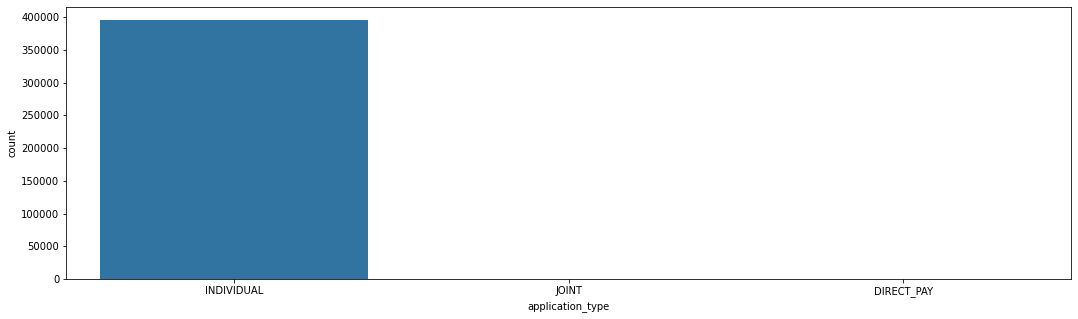

In [89]:
#application_type
fig, ax = plt.subplots(figsize=(18, 5))
sns.countplot(x= 'application_type', data = df, ax= ax)

Insights based on EDA

Univariate analysis for continous variables : 
1. Income of most of the applicants is less than 200000
2. There are certain months in a yaer when most loans are applied for
3. Dti values have a almost normal distribution between 0 and 40
4. There are certain momths of the year when most credit lines are opened. They have a pattern
5. Most of the users have less than 20 open credit lines. 0 to 20 almost normal distribution
6. For number of derogatory public records 0 is bar far the biggest value. Anything >=1 can be considered 1.
7. Revolving credit balance is less than 75000 for 98% of the population
8. Revolving utilization rate is less than 100 for 99% population. Very few are are over utilizing > 100. Most valuea are between 20 and 90
9. Mortagage accounts : 0 accounts for most values. 0 to 9 we have 99% of the values
10. Pub_rec_bankruptcies : 0 accounts for most values


Univariate analysis for categorical variables
1. Most applicants have been employed for 10+ years, apply for loan as an individual and for debt consolidation purposes

#Bivariate done later

In [90]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [91]:
#Data preprocessing 

X = df.drop(['loan_status'], axis=1)
y = df['loan_status']

In [92]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25, random_state=42)

In [93]:
X_train.shape

(237618, 25)

In [94]:
#Now we can do target encoding sperately on train, validation and split 

#Train (X_train,Y_train)
from category_encoders import TargetEncoder


In [95]:
#General target encoding function

In [96]:
#X input variable dataframe
#y target variable
# var_list: list of variables from X that have to be targetencoded
def target_encode(x,y, var_list):
    
    for i in range(0, len(var_list)):
        encoder = TargetEncoder()
        x[var_list[i]] = encoder.fit_transform(x[var_list[i]], y)
    

In [97]:
target_encode(X_train,y_train,['purpose', 'application_type','initial_list_status','address','emp_title'])

In [98]:
target_encode(X_val,y_val,['purpose', 'application_type','initial_list_status','address','emp_title'])

In [99]:
target_encode(X_test,y_test,['purpose', 'application_type','initial_list_status','address','emp_title'])

In [100]:
#Now we can do bivariate analysis on the training data and assume the results hold for the whole dataset

X_trainc = X_train.copy()
X_trainc["target"] = y_train
X_trainc.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,target
249928,7200.0,36,17.57,258.75,3.0,18.0,0.916665,0.0,2,28800.0,...,1.0,2759.0,35.8,16.0,0.80034,0.803995,2.0,1.0,0.803971,1
279578,10000.0,36,11.99,332.10,1.0,9.0,0.807750,11.0,2,56000.0,...,0.0,13838.0,76.0,31.0,0.80640,0.803995,0.0,0.0,0.803971,0
163928,14000.0,36,6.62,429.86,0.0,1.0,0.947280,11.0,2,50000.0,...,0.0,6474.0,8.5,40.0,0.80640,0.803995,3.0,0.0,0.803971,1
84956,3825.0,36,21.70,145.49,4.0,21.0,0.803971,0.0,3,19000.0,...,0.0,4340.0,86.8,7.0,0.80640,0.803995,0.0,0.0,0.803971,0
176970,10000.0,36,13.11,337.47,1.0,8.0,0.737504,2.0,1,40000.0,...,0.0,6438.0,84.7,23.0,0.80640,0.803995,0.0,0.0,0.803971,1


<AxesSubplot:>

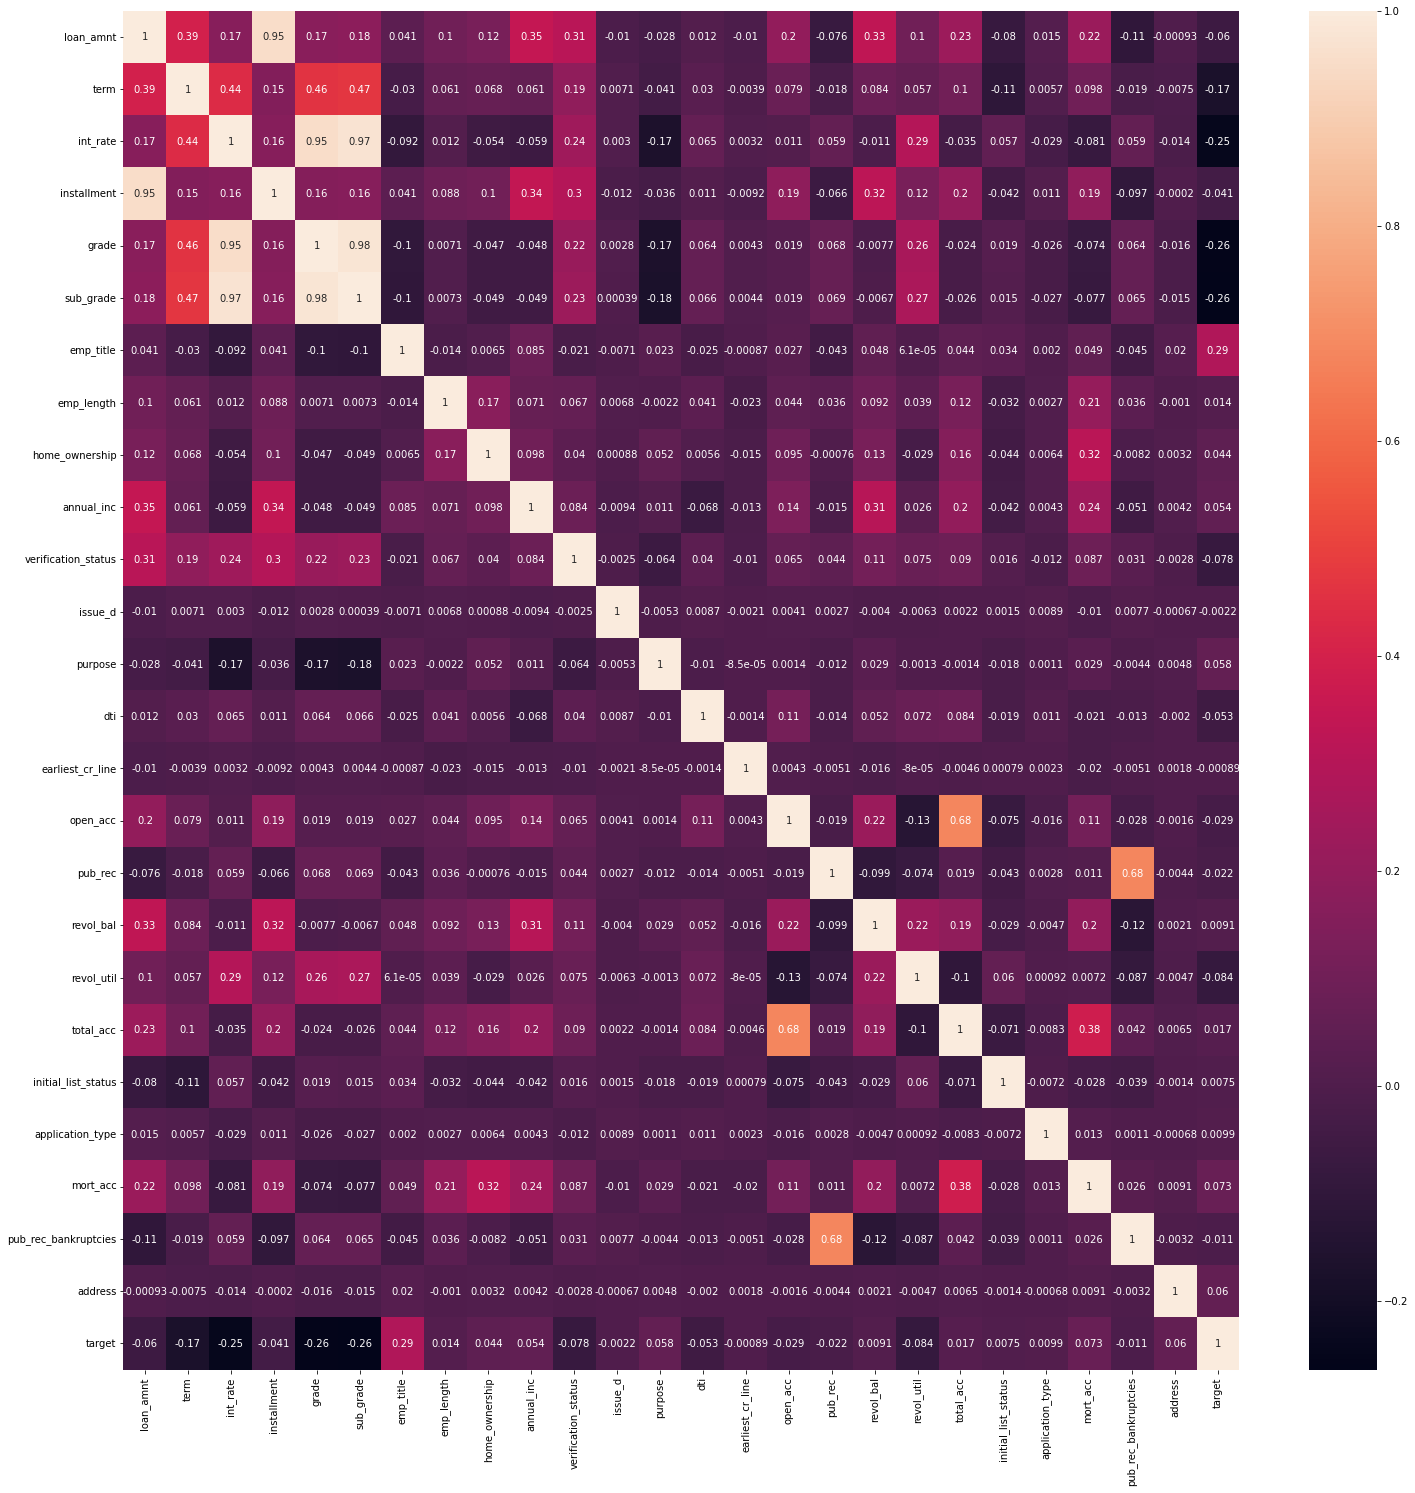

In [101]:
#Bivairate analysis on this target encoded dataframe which includes the target variable
fig, ax = plt.subplots(figsize=(25, 25))
Var_Corr = X_trainc.corr(method = 'pearson')
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True, ax=ax)

<AxesSubplot:>

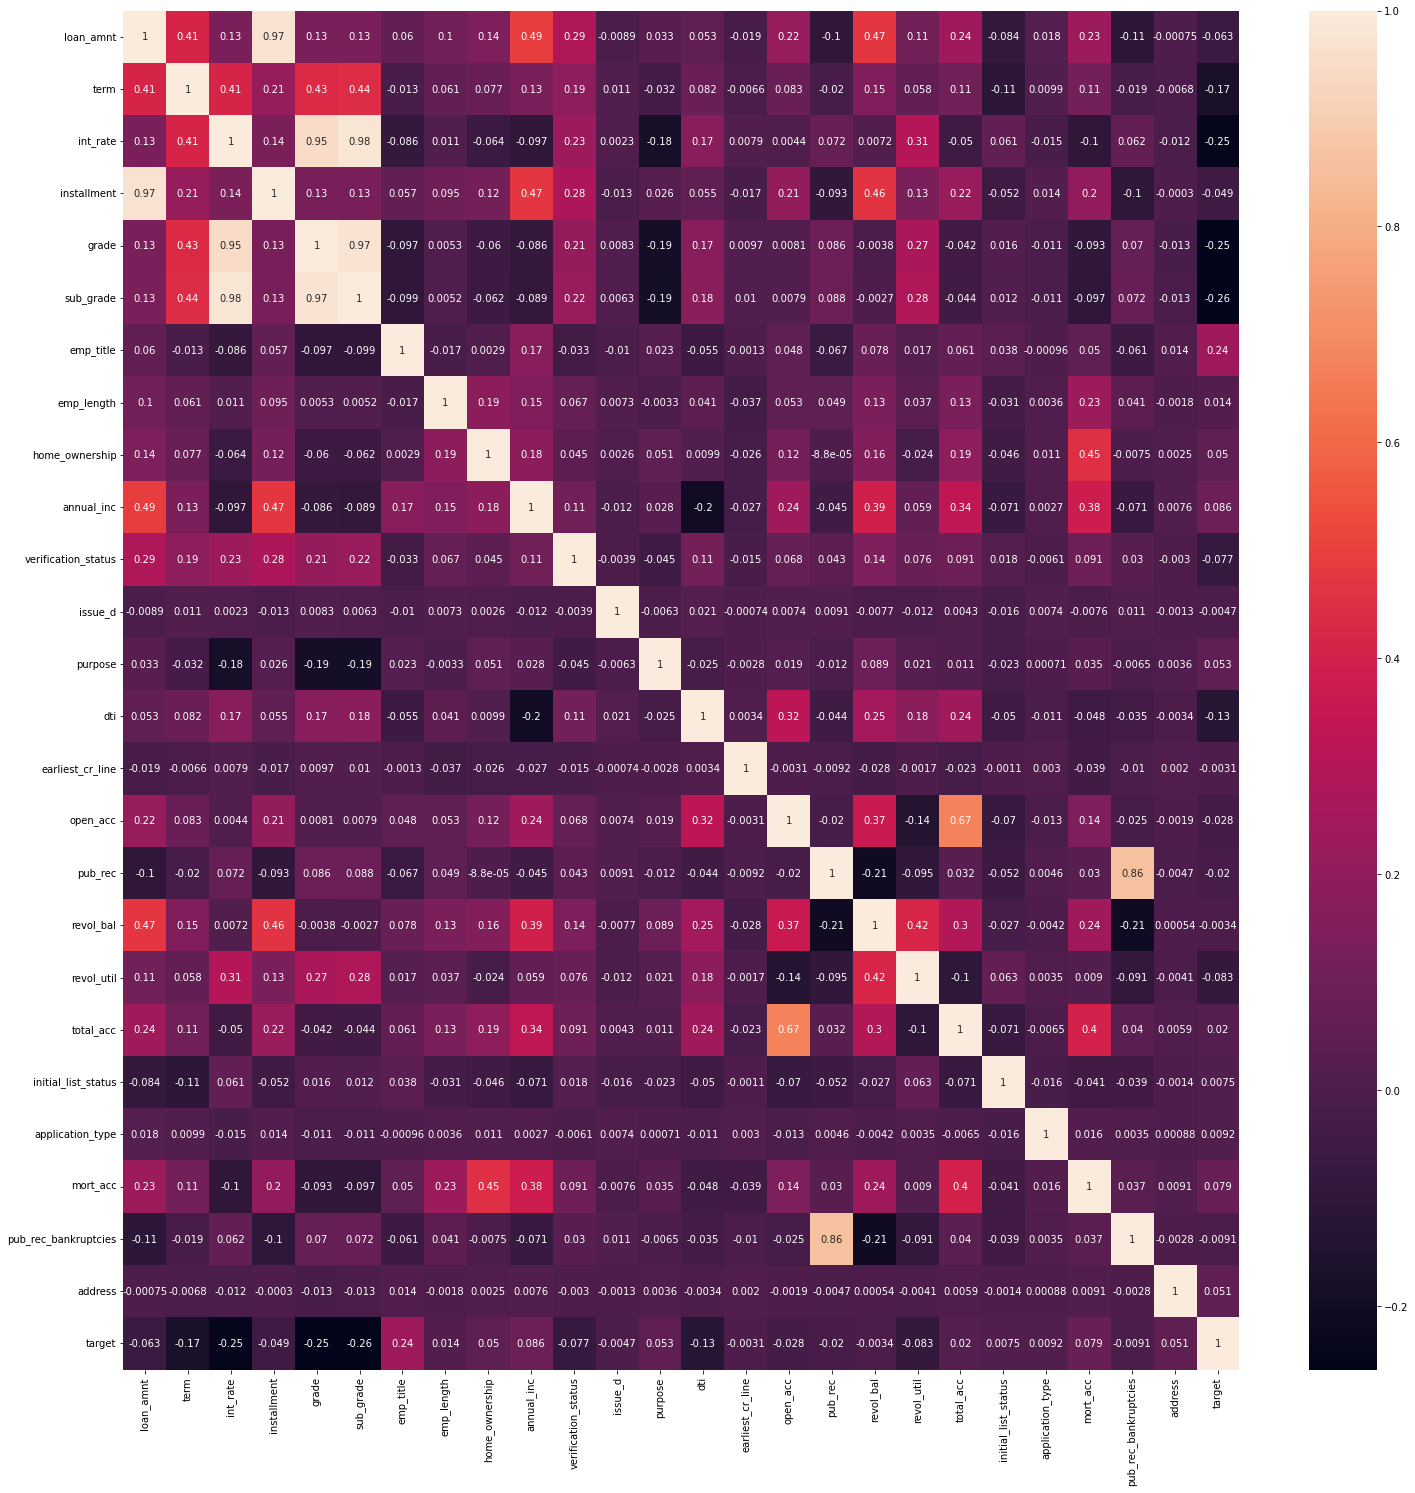

In [102]:
fig, ax = plt.subplots(figsize=(25, 25))
Var_Corr = X_trainc.corr(method = 'spearman')
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True, ax=ax)

#Bivariate analysis :

1) For the target variable there do not seem to be any strong correlation > 0.6 or inverse correaltions !

Strong correlation (>0.6):
1. open_Acc and total_acc : open credit lines and total credit lines 
2. pub_rec and pub_rec_bankruptcies : no of derogaroty public records and publibly recorded bankruptcies 
3. loan amount vs installment
4. interest rate : grade and subgrade (both)


Weakly correalated :
1. loan amount and term
2. term vs interest rate, term vs grade, term vs subgrade
3. installment vs annual income
4. revol_bal : loan_amnt, installment

In [103]:
#Duplicate value check

#Duplicate values in columns are fine. We check for duplicate rows and eliminate them. Every row should be unique

bool_series = X_trainc.duplicated(keep='first')

In [104]:
bool_series.value_counts()
#there are no duplciate rows

False    237618
dtype: int64

In [105]:
#Missing value 
X_train.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title                   0
emp_length              10872
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                169
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                22499
pub_rec_bankruptcies      313
address                     0
dtype: int64

In [106]:
X_train.shape

(237618, 25)

In [107]:
def calc_missing_perc(data,list_var):
    
    for i in range(0, len(list_var)):
        perc =  data[list_var[i]].isna().sum() / data[list_var[i]].count()
        print(list_var[i], perc)

In [108]:
#of missing values in X_train
X_train['emp_length'].isna().sum() / X_train['emp_length'].count()

0.04794792410891482

In [109]:
#% of missing values per column
calc_missing_perc(X_train, ['emp_length','revol_util','mort_acc','pub_rec_bankruptcies'])

emp_length 0.04794792410891482
revol_util 0.0007117317824038004
mort_acc 0.10458862304120045
pub_rec_bankruptcies 0.0013189776869429637


In [110]:
#Cannot delete the columns as none of the columns has more than 30% missing values. Also in this dataset it is better to
#go for mean, median or mode encoding than K nearest neighbors encoding. 
X_train['emp_length'] = X_train['emp_length'].fillna(X_train['emp_length'].mean())
X_train['revol_util'] = X_train['revol_util'].fillna(X_train['revol_util'].mean())
X_train['mort_acc'] = X_train['revol_util'].fillna(X_train['revol_util'].mode())
X_train['pub_rec_bankruptcies'] = X_train['pub_rec_bankruptcies'].fillna(X_train['pub_rec_bankruptcies'].mode())

In [111]:
#Do the same for val
X_val['emp_length'] = X_val['emp_length'].fillna(X_val['emp_length'].mean())
X_val['revol_util'] = X_val['revol_util'].fillna(X_val['revol_util'].mean())
X_val['mort_acc'] = X_val['revol_util'].fillna(X_val['revol_util'].mode())
X_val['pub_rec_bankruptcies'] = X_val['pub_rec_bankruptcies'].fillna(X_val['pub_rec_bankruptcies'].mode())

In [112]:
y_train.isna().sum()

0

In [113]:
y_val.isna().sum()

0

In [114]:
#Outlier treatment. For most columns the value range that lies beyond the max such that min to max cover 99% plus values 
# we make > max = max

def outlier_treatment(data,var,threshold):
    data[var] =  data[var].mask(data[var] >threshold, threshold)

In [115]:
#annual_inc Threshold : 300000
outlier_treatment(X_train, 'annual_inc', 300000)

In [116]:
#dti Threshold : 40
outlier_treatment(X_train, 'dti', 40)

In [117]:
#open_acc : 40
outlier_treatment(X_train, 'open_acc', 40)

In [118]:
#revol_bal 200000
outlier_treatment(X_train, 'revol_bal', 200000)

In [119]:
#revol_util 100
outlier_treatment(X_train, 'revol_util', 100)

In [120]:
#mort_acc 10
outlier_treatment(X_train, 'mort_acc', 10)

In [121]:
#Outlier treatment for validation data
outlier_treatment(X_val, 'annual_inc', 300000)
outlier_treatment(X_val, 'dti', 40)
outlier_treatment(X_val, 'open_acc', 40)
outlier_treatment(X_val, 'revol_bal', 200000)
outlier_treatment(X_val, 'revol_util', 100)
outlier_treatment(X_val, 'mort_acc', 10)

In [122]:
#Feature Engineering
X_train['pub_rec'] = (df['pub_rec'] >= 1).astype(int)

In [123]:
X_train['mort_acc'] = (df['mort_acc'] >= 1).astype(int)

In [124]:
X_train['pub_rec_bankruptcies'] = (df['pub_rec_bankruptcies'] >= 1).astype(int)

In [125]:
#For test data
X_val['pub_rec'] = (df['pub_rec'] >= 1).astype(int)
X_val['mort_acc'] = (df['mort_acc'] >= 1).astype(int)
X_val['pub_rec_bankruptcies'] = (df['pub_rec_bankruptcies'] >= 1).astype(int)

In [137]:
y_train.value_counts()

1    191038
0     46580
Name: loan_status, dtype: int64

In [219]:
#Model Building


#NOTE 
#Even if we delete some columns liem grade, Address, pub_rec_bankruptcies etc the score does not imporve
#Without using class_weight if we use just lambda hyparameter tuning then also we can achieve 81% accuracy
# Using class weights even in the correct way the accuracy does not improve. 

#To prove that this is the best way I also did try other methods that deal with imbalanced data
# Oversampling, Undersampling, SMOTE : all three of them give lower scores !! 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

train_scores = []
val_scores = []
scaler = StandardScaler()

#class_weight={ 0:0.25, 1:0.75 } 
for la in np.arange(0.01, 100.0, 5.00):
    scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la, class_weight={ 0:0.25, 1:0.75 }))
    scaled_lr.fit(X_train, y_train)
    train_score = scaled_lr.score(X_train, y_train)
    val_score = scaled_lr.score(X_val, y_val)
    train_scores.append(train_score)
    val_scores.append(val_score)

In [220]:
len(val_scores)

20

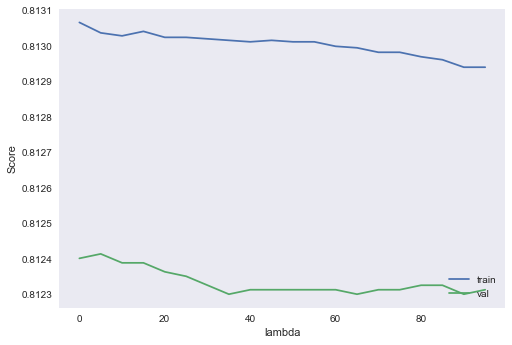

In [221]:
plt.figure()
plt.plot(list(np.arange(0.01, 100.0, 5.0)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 100.0, 5.0)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("Score")
plt.grid()
plt.show()

In [183]:
np.argmax(val_scores)

19

In [184]:
val_scores[0]

0.7887533772693988

In [185]:
l_best = 0.01 + 19*5

In [186]:
# Model with lambda=
scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/l_best, class_weight={ 0:0.25, 1:0.75 }))
scaled_lr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.010525207872855488,
                                    class_weight={0: 0.25, 1: 0.75}))])

In [187]:
#We need to encode, missing value treatment, outlier treatment and feature engineer the test data as well
#it has already been encoded

#missing value treatment
X_test['emp_length'] = X_test['emp_length'].fillna(X_test['emp_length'].mean())
X_test['revol_util'] = X_test['revol_util'].fillna(X_test['revol_util'].mean())
X_test['mort_acc'] = X_test['revol_util'].fillna(X_test['revol_util'].mode())
X_test['pub_rec_bankruptcies'] = X_test['pub_rec_bankruptcies'].fillna(X_test['pub_rec_bankruptcies'].mode())

#outlier tretment
outlier_treatment(X_test, 'annual_inc', 300000)
outlier_treatment(X_test, 'dti', 40)
outlier_treatment(X_test, 'open_acc', 40)
outlier_treatment(X_test, 'revol_bal', 200000)
outlier_treatment(X_test, 'revol_util', 100)
outlier_treatment(X_test, 'mort_acc', 10)

#feature engineering
X_test['pub_rec'] = (df['pub_rec'] >= 1).astype(int)
X_test['mort_acc'] = (df['mort_acc'] >= 1).astype(int)
X_test['pub_rec_bankruptcies'] = (df['pub_rec_bankruptcies'] >= 1).astype(int)

In [188]:
test_score = scaled_lr.score(X_test, y_test)
print(test_score)

0.8114915536701764


In [189]:
y_pred = scaled_lr.predict(X_test)

In [190]:
from sklearn.metrics import accuracy_score
print(f"Accuracy : {accuracy_score(y_test, y_pred)*100}%")

Accuracy : 81.14915536701764%


In [191]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.8947030656069507

In [192]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[  841, 14736],
       [  195, 63434]], dtype=int64)

In [193]:
#Display model coefficients with column names.
import itertools


merged = list(itertools.chain(*scaled_lr[1].coef_))
l1 = list(zip(merged, X_test.columns))
print(l1)

[(-0.034514916466545295, 'loan_amnt'), (-0.19863503222759157, 'term'), (0.11337946232917807, 'int_rate'), (-0.05297901795729347, 'installment'), (-0.0757599335475406, 'grade'), (-0.4605746673168665, 'sub_grade'), (0.6692291962363252, 'emp_title'), (0.03938530686345426, 'emp_length'), (0.06855718774366297, 'home_ownership'), (0.10513340508441239, 'annual_inc'), (-0.036677523617061274, 'verification_status'), (0.002294182692491704, 'issue_d'), (0.047050444222626824, 'purpose'), (-0.1866916078724502, 'dti'), (0.004942761536353713, 'earliest_cr_line'), (-0.13036205704326417, 'open_acc'), (-0.07478058701798915, 'pub_rec'), (0.05684037971758488, 'revol_bal'), (-0.11326817377868703, 'revol_util'), (0.10001157643769852, 'total_acc'), (-0.023295385670632104, 'initial_list_status'), (-0.001902263085749095, 'application_type'), (0.07065617135559678, 'mort_acc'), (0.06300485484425601, 'pub_rec_bankruptcies'), (0.146768394612366, 'address')]


In [194]:




#Oversampling the Train data

from collections import Counter

In [195]:
from imblearn.over_sampling import RandomOverSampler

In [196]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [197]:
X_traino, y_traino = oversample.fit_resample(X_train, y_train)

In [198]:
print(Counter(y_traino))

Counter({1: 191038, 0: 191038})


In [199]:
train_scores = []
val_scores = []
scaler = StandardScaler()

#class_weight={ 0:0.25, 1:0.75 } 
for la in np.arange(0.01, 5.0, 0.05):
    scaled_lro = make_pipeline( scaler, LogisticRegression(C=1/l_best,))
    scaled_lro.fit(X_traino, y_traino)
    train_score = scaled_lro.score(X_traino, y_traino)
    val_score = scaled_lro.score(X_val, y_val)
    train_scores.append(train_score)
    val_scores.append(val_score)

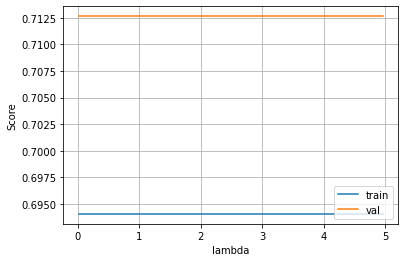

In [200]:
plt.figure()
plt.plot(list(np.arange(0.01, 5.0, 0.05)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 5.0, 0.05)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("Score")
plt.grid()
plt.show()

In [201]:
#Undersampling the train data

from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='majority')
X_traino, y_traino = undersample.fit_resample(X_train, y_train)

In [202]:
print(Counter(y_traino))

Counter({0: 46580, 1: 46580})


In [285]:
train_scores = []
val_scores = []
scaler = StandardScaler()

#class_weight={ 0:0.25, 1:0.75 } 
for la in np.arange(0.01, 5.0, 0.05):
    scaled_lru = make_pipeline( scaler, LogisticRegression(C=1/l_best,))
    scaled_lru.fit(X_traino, y_traino)
    train_score = scaled_lru.score(X_traino, y_traino)
    val_score = scaled_lru.score(X_val, y_val)
    train_scores.append(train_score)
    val_scores.append(val_score)

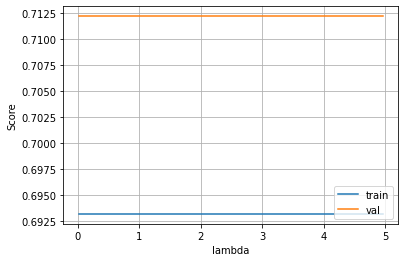

In [286]:
plt.figure()
plt.plot(list(np.arange(0.01, 5.0, 0.05)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 5.0, 0.05)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("Score")
plt.grid()
plt.show()

In [287]:
#Lets try SMOTE
from imblearn.over_sampling import SMOTE

In [288]:
oversample = SMOTE()
X_trainsm, y_trainsm = oversample.fit_resample(X_train, y_train)

In [291]:
train_scores = []
val_scores = []
scaler = StandardScaler()

for la in np.arange(0.01, 100.0, 5):
    scaled_lrsm = make_pipeline( scaler, LogisticRegression())
    scaled_lrsm.fit(X_trainsm, y_trainsm)
    train_score = scaled_lrsm.score(X_trainsm, y_trainsm)
    val_score = scaled_lrsm.score(X_val, y_val)
    train_scores.append(train_score)
    val_scores.append(val_score)

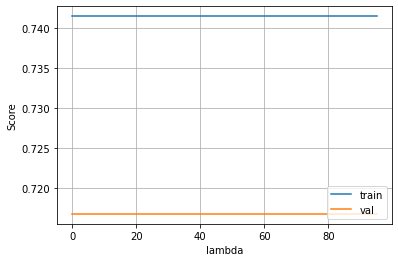

In [292]:
plt.figure()
plt.plot(list(np.arange(0.01, 100.0, 5)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 100.0, 5)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("Score")
plt.grid()
plt.show()

In [ ]:
# Results Evaluation

0.7616918717905738


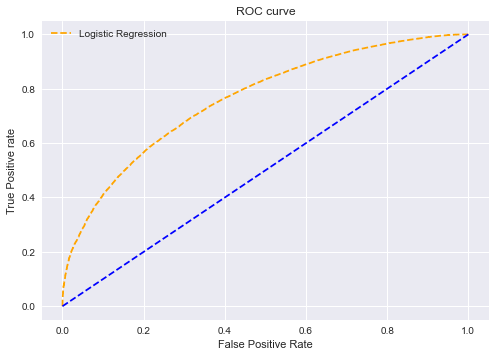

In [205]:
#ROC AUC Curve & comments
from sklearn.metrics import roc_curve

scaled_lrac = make_pipeline( scaler, LogisticRegression(C=1/l_best, class_weight={ 0:0.25, 1:0.75 }))
scaled_lrac.fit(X_train, y_train)
pred_prob = scaled_lrac.predict_proba(X_test)

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, pred_prob[:,1])
print(auc_score)

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [206]:
#The auc score is around 0.76. The model is not an ideal one or a very precise one but it is still a 
# fair model auc: 0.7-0.8

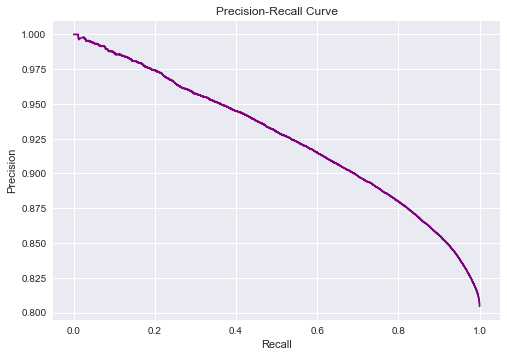

In [304]:
#Precision-Recall Curve & comments (10 Points)

from sklearn.metrics import precision_recall_curve

classifier = make_pipeline( scaler, LogisticRegression(C=1/l_best, class_weight={ 0:0.25, 1:0.75 }))
classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()


In [ ]:
#The model is good. For a recall value of 0.7 we have a precision of 0.9
# Recall value of 0.8 it is around 0.88

In [308]:
#Classification Report and Confusion Matrix
from sklearn.metrics import classification_report

scaled_lrcr = make_pipeline( scaler, LogisticRegression(C=1/l_best, class_weight={ 0:0.25, 1:0.75 }))
scaled_lrcr.fit(X_train, y_train)

y_pred = scaled_lrcr.predict(X_test)

In [309]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.05      0.10     15577
           1       0.81      1.00      0.89     63629

    accuracy                           0.81     79206
   macro avg       0.81      0.53      0.50     79206
weighted avg       0.81      0.81      0.74     79206



In [ ]:
#for class 0 the recall is 0. Precision is good for both

In [310]:
confusion_matrix(y_test, y_pred)

array([[  856, 14721],
       [  202, 63427]], dtype=int64)

In [ ]:
#Rest of the TEXT answers are provided in text